# <center>Markowitz com Python<center>
    
- Coleta de dados do Yahoo Finance
- Problema de otimização
- Plotagem da Fronteira de Pareto    

# <center>Selecionando os ativos<center>

In [1]:
import pandas as pd
#ler arquivo com dados Ibovespa
df_ibovespa = pd.read_csv('IBOVDia_22-11-23.csv', sep=';', encoding='latin-1',decimal=',')

In [2]:
df_ibovespa.head(3)

,Código,Ação,Tipo,Qtde. Teórica,Part. (%)
0,RRRP3,3R PETROLEUM,ON NM,235.661.666,0.356
1,ALOS3,ALLOS,ON NM,532.616.595,0.618
2,ALPA4,ALPARGATAS,PN N1,208.965.950,0.091


In [3]:
df_ibovespa.sort_values(by=['Código'], inplace = True)

# <center> Série histórica de retornos <center>

In [4]:
ativos = df_ibovespa['Código'].values+'.SA'

In [5]:
ativos

array(['ABEV3.SA', 'ALOS3.SA', 'ALPA4.SA', 'ARZZ3.SA', 'ASAI3.SA',
       'AZUL4.SA', 'B3SA3.SA', 'BBAS3.SA', 'BBDC3.SA', 'BBDC4.SA',
       'BBSE3.SA', 'BEEF3.SA', 'BHIA3.SA', 'BPAC11.SA', 'BRAP4.SA',
       'BRFS3.SA', 'BRKM5.SA', 'CCRO3.SA', 'CIEL3.SA', 'CMIG4.SA',
       'CMIN3.SA', 'COGN3.SA', 'CPFE3.SA', 'CPLE6.SA', 'CRFB3.SA',
       'CSAN3.SA', 'CSNA3.SA', 'CVCB3.SA', 'CYRE3.SA', 'DXCO3.SA',
       'EGIE3.SA', 'ELET3.SA', 'ELET6.SA', 'EMBR3.SA', 'ENEV3.SA',
       'ENGI11.SA', 'EQTL3.SA', 'EZTC3.SA', 'FLRY3.SA', 'GGBR4.SA',
       'GOAU4.SA', 'GOLL4.SA', 'HAPV3.SA', 'HYPE3.SA', 'IGTI11.SA',
       'IRBR3.SA', 'ITSA4.SA', 'ITUB4.SA', 'JBSS3.SA', 'KLBN11.SA',
       'LREN3.SA', 'LWSA3.SA', 'MGLU3.SA', 'MRFG3.SA', 'MRVE3.SA',
       'MULT3.SA', 'NTCO3.SA', 'PCAR3.SA', 'PETR3.SA', 'PETR4.SA',
       'PETZ3.SA', 'PRIO3.SA', 'RADL3.SA', 'RAIL3.SA', 'RAIZ4.SA',
       'RDOR3.SA', 'RECV3.SA', 'RENT3.SA', 'RRRP3.SA', 'SANB11.SA',
       'SBSP3.SA', 'SLCE3.SA', 'SMTO3.SA', 'SOMA3.SA', 'S

ativos = ['ABEV3.SA', 'ALPA4.SA', 'AMER3.SA', 'ARZZ3.SA', 'ASAI3.SA',
       'AZUL4.SA', 'B3SA3.SA', 'BBAS3.SA', 'BBDC3.SA', 'BBDC4.SA',
       'BBSE3.SA', 'BEEF3.SA', 'BPAC11.SA', 'BPAN4.SA', 'BRAP4.SA',
       'BRFS3.SA', 'BRKM5.SA',  'CASH3.SA', 'CCRO3.SA',
       'CIEL3.SA', 'CMIG4.SA', 'CMIN3.SA', 'COGN3.SA', 'CPFE3.SA',
       'CPLE6.SA', 'CRFB3.SA', 'CSAN3.SA', 'CSNA3.SA', 'CVCB3.SA',
       'CYRE3.SA', 'DXCO3.SA', 'ECOR3.SA', 'EGIE3.SA', 'ELET3.SA',
       'ELET6.SA', 'EMBR3.SA',  'ENEV3.SA', 'ENGI11.SA',
       'EQTL3.SA', 'EZTC3.SA', 'FLRY3.SA', 'GGBR4.SA', 'GOAU4.SA',
       'GOLL4.SA', 'HAPV3.SA', 'HYPE3.SA', 'IGTI11.SA', 'IRBR3.SA',
       'ITSA4.SA', 'ITUB4.SA', 'JBSS3.SA', 'KLBN11.SA', 'LREN3.SA',
       'LWSA3.SA', 'MGLU3.SA', 'MRFG3.SA', 'MRVE3.SA', 'MULT3.SA',
       'NTCO3.SA', 'PCAR3.SA', 'PETR3.SA', 'PETR4.SA', 'PETZ3.SA',
       'POSI3.SA', 'PRIO3.SA', 'QUAL3.SA', 'RADL3.SA', 'RAIL3.SA',
       'RAIZ4.SA', 'RDOR3.SA', 'RENT3.SA', 'RRRP3.SA', 'SANB11.SA',
       'SBSP3.SA', 'SLCE3.SA', 'SMTO3.SA', 'SOMA3.SA', 
       'SUZB3.SA', 'TAEE11.SA', 'TIMS3.SA', 'TOTS3.SA', 'UGPA3.SA',
       'USIM5.SA', 'VALE3.SA', 'VBBR3.SA', 'VIVT3.SA',
       'WEGE3.SA', 'YDUQ3.SA']

In [6]:
data_inicial = '2023-09-28'
data_final = '2023-10-28'

In [7]:
import yfinance as yf
preco_ativos = yf.download(tickers=ativos.tolist(), start=data_inicial, end=data_final, rounding=True)['Adj Close']
retornos = preco_ativos.pct_change()
retornos.columns = retornos.columns.str.rstrip('.SA')  
retornos = retornos.dropna()

[*********************100%%**********************]  86 of 86 completed


# <center>Modelagem da otimização<center>
    
$$\mathrm{\min} \,\,\, x^TCov\,\, x\,\,\,\,\mathrm{\max} \,\,\, \mu^Tx$$

<center>sujeito a<center>

$$\displaystyle\sum_{i=1}^n x_i=1$$

$$x_i\geq0, i=1,\cdots,n$$
    
$$x_i\leq1, i=1,\cdots,n$$    
    
## <center>Otimização ponderada <center>

$$\mathrm{\min} \,\,\, \alpha x^TCov\,\, x - (1-\alpha) \mu^Tx$$

<center>sujeito a<center>

$$[1,\cdots,1]_{1\times n}x=1$$

$$0\leq x_i\leq 1, i=1,\cdots,n$$
    
    
## <center>Código em Python<center>   
    
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html

## <center>Parâmetros<center>

In [8]:
import numpy as np
QTD_ASSETS = len(ativos)
TAM_TRAIN = 200
QTD_PONTOS_FRONT = 20
PONTOS_FRONT = np.linspace(0, 1, QTD_PONTOS_FRONT)
TRAIN_RETURN = retornos[0:TAM_TRAIN-1]

In [9]:
TRAIN_RETURN

,ABEV3,ALOS3,ALPA4,ARZZ3,ASAI3,AZUL4,B3SA3,BBAS3,BBDC3,BBDC4,...,TIMS3,TOTS3,UGPA3,USIM5,VALE3,VAMO3,VBBR3,VIVT3,WEGE3,YDUQ3
Date,,,,,,,,,,,,,,,,,,,,,
2023-10-19,-0.000798,-0.001364,0.005487,-0.014036,0.015712,-0.008514,-0.011680,0.007752,0.006395,0.004881,...,0.001299,0.003070,-0.001012,-0.012945,-0.014370,-0.013580,0.012579,-0.001311,-0.010207,0.007563
2023-10-20,-0.002396,0.002732,-0.016371,0.003993,0.008189,-0.035129,0.013636,-0.003239,-0.012708,-0.018737,...,-0.014916,-0.015685,0.003546,-0.024590,-0.027120,0.005006,0.012940,-0.014007,-0.003830,-0.019303
2023-10-23,-0.000801,0.038147,0.031900,0.020405,0.039711,0.046117,0.014350,-0.001422,0.000805,0.001414,...,-0.001317,0.000777,-0.004038,-0.003361,-0.001772,0.012453,0.004088,-0.001332,0.002662,0.008201
2023-10-24,0.003205,0.020560,0.052419,0.006779,-0.012153,0.020882,0.025641,-0.004678,0.002412,0.000000,...,0.005274,-0.005825,0.008616,0.006745,0.022760,-0.013530,0.012723,0.018449,0.032743,0.005965
2023-10-25,-0.006390,-0.007715,-0.005109,-0.023060,-0.030756,-0.026515,-0.005172,0.000204,-0.006415,-0.002825,...,-0.003934,-0.003906,0.013568,-0.016750,-0.000947,-0.042394,0.003518,-0.007202,-0.101114,-0.014016
2023-10-26,0.015273,0.019438,0.029525,0.033425,0.060743,0.039689,0.016464,0.020838,0.023406,0.025496,...,0.011850,0.035294,0.041150,0.018739,0.021485,0.045573,0.035553,0.012091,0.037814,0.026791
2023-10-27,-0.026920,-0.019915,-0.029925,-0.037679,-0.048718,-0.042665,-0.045183,-0.025415,-0.016562,-0.010359,...,-0.027326,-0.031818,-0.025238,0.041806,0.034797,-0.043587,-0.029014,-0.028454,-0.031537,-0.020234


### <center>Verificando se a matriz de covariância é Definida Positiva<center>

In [10]:
def is_pos_def(A):
    M = np.matrix(A)
    return np.all(np.linalg.eigvals(M) > 0)

In [11]:
is_pos_def(TRAIN_RETURN.cov())

False

## <center>Preparando para o Python<center>
    
- Bounds: $lb \leq x \leq ub$
    
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.Bounds.html    

In [12]:
from scipy.optimize import Bounds
bounds = Bounds(np.zeros(QTD_ASSETS), np.ones(QTD_ASSETS))

## <center>Restrições de desigualdade (linear)<center>
 
$$lb \leq A\cdot x \leq ub$$    
    
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.LinearConstraint.html#scipy.optimize.LinearConstraint    
- Note que temos uma restrição de igualdade: $A\cdot x = 1$    
    
- É possível tratar uma restrição de igualdade como uma restrição de desigualdade? Sim

- Note que $$A\cdot x=1 \,\,\,\Leftrightarrow\,\,\, 1\leq A\cdot x\leq 1$$   
    

In [13]:
from scipy.optimize import LinearConstraint
A = [QTD_ASSETS*[1]]
linear_constraint = LinearConstraint(A,[1], [1])

## <center>Solução inicial<center>

In [14]:
U0 = 1/QTD_ASSETS*np.ones(QTD_ASSETS)

## <center>Funções objetivo<center>

In [15]:
def get_portfolio_return(U):
    return TRAIN_RETURN.mean().values.dot(U)

def get_portfolio_risk(U):
    return (U.dot(TRAIN_RETURN.cov())).dot(U)

## <center>Algoritmo de otimização<center>

In [16]:
from scipy.optimize import minimize
def get_optimize(aux_ponto_front):
    
    def objective_function(U,ponto_front=aux_ponto_front):
        portfolio_risk = get_portfolio_risk(U)
        portfolio_return = get_portfolio_return(U)
        return ponto_front*portfolio_risk-(1-ponto_front)*portfolio_return
    
    Umin = minimize(objective_function, U0, method='SLSQP',  bounds=bounds, constraints=linear_constraint)    
    
    return Umin.x

## <center>Construção da Fronteira de Pareto<center>

In [17]:
def get_pareto_front():
    carteiras_front = []
    for ponto_front in PONTOS_FRONT:
        carteira = get_optimize(ponto_front)
        carteiras_front.append(carteira)
    retorno = np.zeros(QTD_PONTOS_FRONT)
    risco = np.zeros(QTD_PONTOS_FRONT)
    for i in range(QTD_PONTOS_FRONT):
        retorno[i] = get_portfolio_return(carteiras_front[i])
        risco[i] = get_portfolio_risk(carteiras_front[i])
    return retorno,risco,carteiras_front    

In [18]:
retorno, risco,carteiras_front = get_pareto_front()

# <center>Gráfico - Fronteira de Pareto<center>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


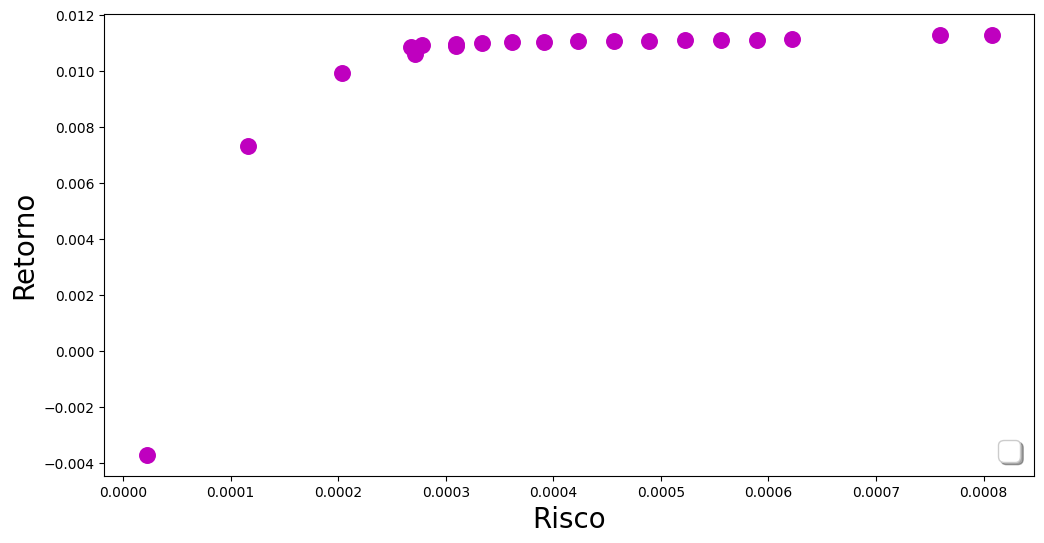

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,6))
plt.scatter(risco,retorno,marker='.',s=500,c="m")
plt.xlabel('Risco', fontsize=20)
plt.ylabel('Retorno', fontsize=20)
legend = plt.legend(loc='lower right', shadow=True, fontsize=20, ncol = 2)
#plt.axis([0.00022, 0.00023, 0.0024, 0.0065]) # [xmin, xmax, ymin, ymax]
plt.show()

# <center>Comparando com o Ibovespa<center>

In [20]:
ibovespa_composition = df_ibovespa['Part. (%)']/100

In [21]:
ibovespa_composition.values

array([0.02718, 0.00618, 0.00091, 0.00175, 0.00794, 0.00258, 0.03365,
       0.03309, 0.00946, 0.0365 , 0.00986, 0.00084, 0.00063, 0.01729,
       0.00293, 0.01093, 0.00243, 0.00598, 0.00191, 0.00832, 0.0036 ,
       0.00251, 0.00314, 0.00714, 0.00265, 0.00968, 0.00433, 0.00063,
       0.00245, 0.001  , 0.0051 , 0.03641, 0.00546, 0.00667, 0.00924,
       0.00684, 0.01717, 0.00072, 0.0027 , 0.01204, 0.00328, 0.00081,
       0.00925, 0.00643, 0.00218, 0.00166, 0.02378, 0.06784, 0.01113,
       0.0075 , 0.0063 , 0.00121, 0.00281, 0.00114, 0.00173, 0.0033 ,
       0.00606, 0.00027, 0.04488, 0.07401, 0.00063, 0.01763, 0.01643,
       0.01284, 0.002  , 0.01377, 0.00251, 0.02356, 0.00356, 0.00484,
       0.01017, 0.00177, 0.00219, 0.00151, 0.01666, 0.00365, 0.00623,
       0.00781, 0.01239, 0.00184, 0.1542 , 0.00189, 0.01106, 0.00987,
       0.02295, 0.00263])

In [22]:
ibovespa_risk = get_portfolio_risk(ibovespa_composition.values)
ibovespa_return = get_portfolio_return(ibovespa_composition.values)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


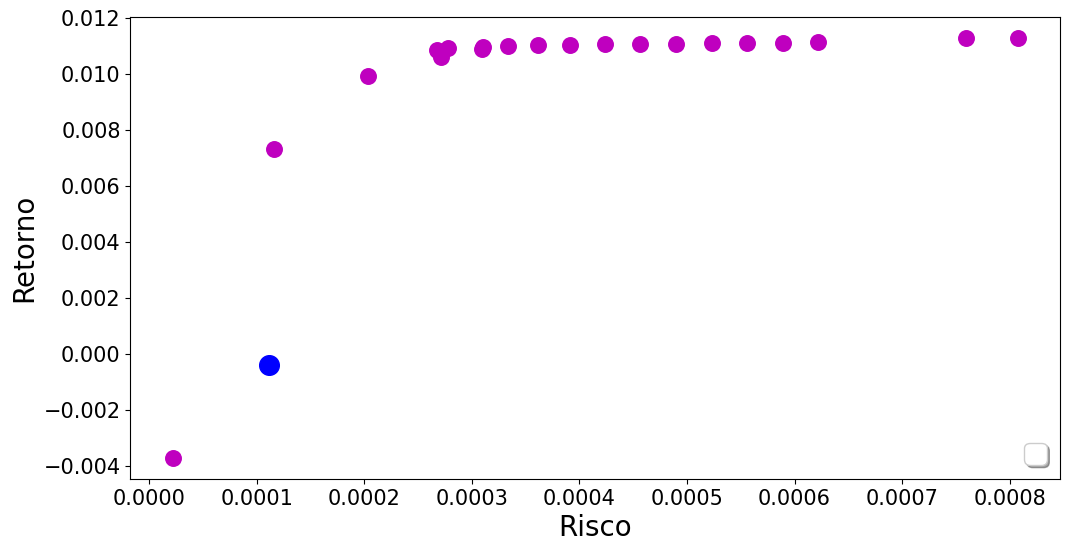

In [24]:
plt.figure(figsize = (12,6))
plt.scatter(risco,retorno,marker='.',s=500,c="m")
plt.scatter(ibovespa_risk,ibovespa_return,marker='.',s=800,c="b")
plt.xlabel('Risco', fontsize=20)
plt.ylabel('Retorno', fontsize=20)
legend = plt.legend(loc='lower right', shadow=True, fontsize=20, ncol = 2)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
#plt.axis([0.00022, 0.00023, 0.0024, 0.0065]) # [xmin, xmax, ymin, ymax]
plt.show()

# <center>Otimizando o Índice de Sharpe<center>
    
$$ IS = \dfrac{R_p-R_f}{\sigma_p}$$
    
- $R_p$: Retorno do portfólio
- $R_f$: Retorno do ativo livre de risco
- $\sigma_p$: Desvio padrão do portfólio    

In [25]:
# Obtém informações do ativo livre de risco
def consulta_bc(codigo_bcb):
    url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo_bcb)
    df = pd.read_json(url)
    df['data'] = pd.to_datetime(df['data'], dayfirst=True)
    df.set_index('data', inplace=True)
    return df

selic = consulta_bc(432) #puxa base histórica
selic = selic/100

In [26]:
selic

,valor
data,
1999-03-05,0.4500
1999-03-06,0.4500
1999-03-07,0.4500
1999-03-08,0.4500
1999-03-09,0.4500
...,...
2023-12-09,0.1225
2023-12-10,0.1225
2023-12-11,0.1225


In [27]:
selic = selic.loc[data_inicial:data_final] #utiliza apenas as datas do dataframe

In [28]:
selic

,valor
data,
2023-09-28,0.1275
2023-09-29,0.1275
2023-09-30,0.1275
2023-10-01,0.1275
2023-10-02,0.1275
2023-10-03,0.1275
2023-10-04,0.1275
2023-10-05,0.1275
2023-10-06,0.1275


In [29]:
selic.rename({'valor': 'Selic'}, axis=1, inplace=True)

C:\Users\toni\AppData\Local\Temp\ipykernel_19424\1028064981.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selic.rename({'valor': 'Selic'}, axis=1, inplace=True)


In [30]:
RF = (1 + selic.mean().values[0])**(1/252)-1

In [31]:
RF

0.0004763149590834015

In [32]:
def sharpe_function(U):
    portfolio_risk = get_portfolio_risk(U)
    portfolio_return = get_portfolio_return(U)
    return -1*(portfolio_return-RF)/portfolio_risk

Umin_sharpe = minimize(sharpe_function, U0, method='SLSQP',  bounds=bounds, constraints=linear_constraint)        

In [33]:
sharpe_risk = get_portfolio_risk(Umin_sharpe.x)
sharpe_return = get_portfolio_return(Umin_sharpe.x)

In [34]:
sharpe_function(Umin_sharpe.x)*(-1)

204.01518542139894

In [35]:
get_portfolio_return(Umin_sharpe.x)

0.0037554388068846067

In [36]:
RF

0.0004763149590834015

In [37]:
get_portfolio_risk(Umin_sharpe.x)

1.6072940065848947e-05

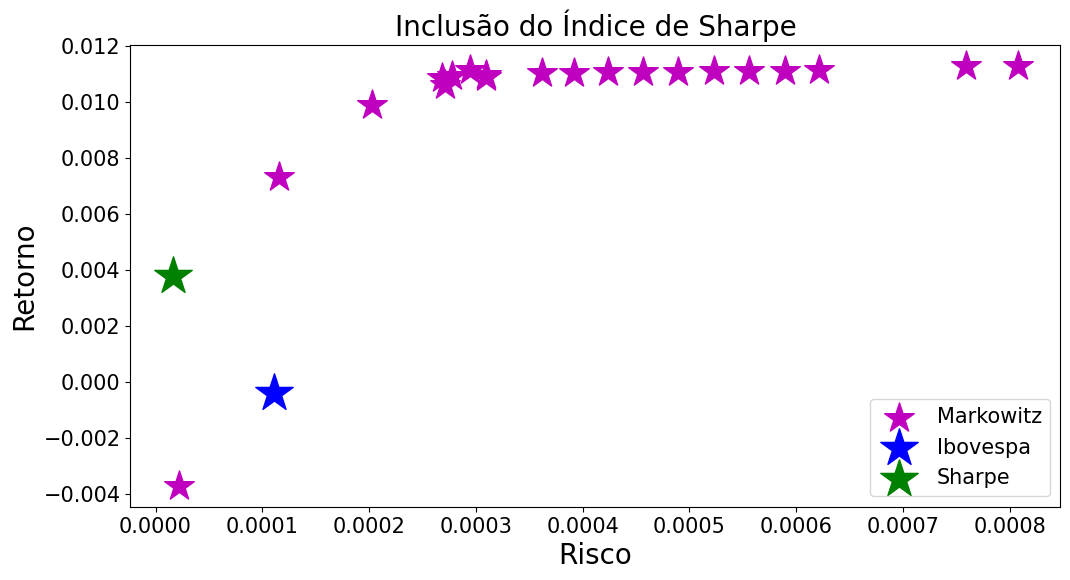

In [91]:
plt.figure(figsize = (12,6))
plt.scatter(risco,retorno,marker='*',s=500,c="m",label='Markowitz')
plt.scatter(ibovespa_risk,ibovespa_return,marker='*',s=800,c="b",label='Ibovespa')
plt.scatter(sharpe_risk,sharpe_return,marker='*',s=800,c="g",label='Sharpe')
plt.xlabel('Risco', fontsize=20)
plt.ylabel('Retorno', fontsize=20)
plt.title('Inclusão do Índice de Sharpe', fontsize=20)
legend = plt.legend(loc='lower right', fontsize=15, ncol = 1)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

# <center>Deixando tudo num DataFrame<center>

In [ ]:
df_ibovespa['Código'].values

In [ ]:
carteiras = ['Carteira'+str(i) for i in range(QTD_PONTOS_FRONT)]

In [ ]:
df_carteiras = pd.DataFrame([], index = carteiras, columns = df_ibovespa['Código'].values)

In [ ]:
for posicao, carteira in enumerate(carteiras):
    df_carteiras.loc[carteira] = carteiras_front[posicao].round(2)

# Salvando em Excel

In [ ]:
import xlsxwriter
writer_portfolio = pd.ExcelWriter('carteiras_otimas.xlsx', engine='xlsxwriter')
df_carteiras.to_excel(writer_portfolio, index=True, sheet_name='carteiras_otimas')
writer_portfolio.save()